<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


In [1]:
pip install yfinance pandas matplotlib plotly beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
import yfinance as yf
import pandas as pd

<h3>Question 1: Extracting Tesla Stock Data Using yfinance (2 Points)</h3>

In [ ]:


# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Save the data to a CSV file
tesla_data.to_csv("tesla_stock_data.csv")

# Display the first few rows of the data
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


<h3>Question 2: Extracting Tesla Revenue Data Using Web Scraping (1 Point)</h3>

In [ ]:

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text
beautiful_soup = BeautifulSoup(html_data,'html5lib')
tesla_revenue = pd.read_html(url)[1]
tesla_revenue.columns = ['Date','Revenue']
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',',"")
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

/var/folders/7z/rv24y7_j4yd_tptjjxqps_540000gn/T/ipykernel_10535/716419240.py:45: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"")


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


<h3>Question 3: Extracting GameStop Stock Data Using yfinance (2 Points)</h3>

In [3]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Save the data to a CSV file
gme_data.to_csv("gme_stock_data.csv")

# Display the first few rows of the data
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


<h3>Question 4: Extracting GameStop Revenue Data Using Web Scraping (1 Point)</h3>

In [7]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url).text

beautiful_soup2 = BeautifulSoup(html_data_2,'html5lib')

gme_revenue = pd.read_html(url)[1]
gme_revenue.columns = ['Date','Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',',"")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"")

gme_revenue.tail()

/var/folders/7z/rv24y7_j4yd_tptjjxqps_540000gn/T/ipykernel_10535/1499644192.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"")


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


<h3>Question 5: Tesla Stock and Revenue Dashboard (2 Points)</h3>

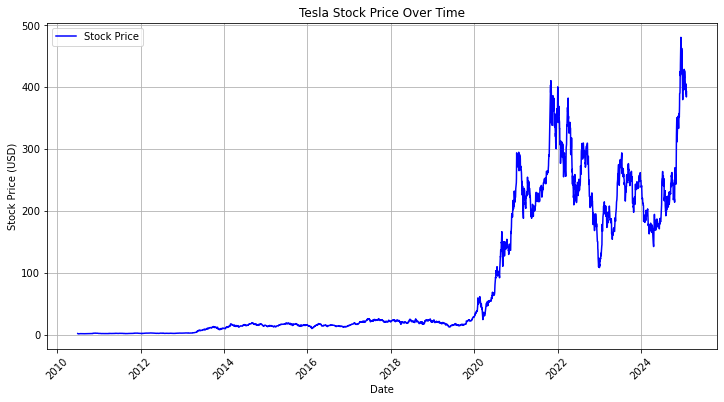

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(x, y, title):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color='blue', label="Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Load Tesla stock data
tesla_stock = pd.read_csv("tesla_stock_data.csv")

# Convert 'Date' to datetime format for better visualization
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])

# Sort by date (if necessary)
tesla_stock = tesla_stock.sort_values(by="Date")

# Call make_graph function
make_graph(tesla_stock["Date"], tesla_stock["Close"], "Tesla Stock Price Over Time")


<h3>Question 6: GameStop Stock and Revenue Dashboard (2 Points)</h3>

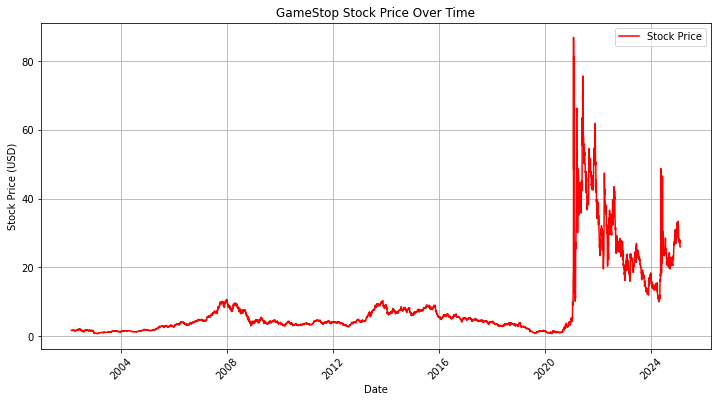

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(x, y, title):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color='red', label="Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Load GameStop stock data
gme_stock = pd.read_csv("gme_stock_data.csv")

# Convert 'Date' to datetime format for better visualization
gme_stock['Date'] = pd.to_datetime(gme_stock['Date'])

# Sort by date (if necessary)
gme_stock = gme_stock.sort_values(by="Date")

# Call make_graph function
make_graph(gme_stock["Date"], gme_stock["Close"], "GameStop Stock Price Over Time")
